一 

损失函数： 用损失函数来衡量预测结果是否跟实际相符的程度， 一般损失函数越小，表明结果越让人满意。

这里主要介绍了两种损失函数：多类支持向量机损失（Multiclass Support Vector Machine Loss） + softmax损失

先讲 多类支持向量机损失（Multiclass Support Vector Machine Loss）
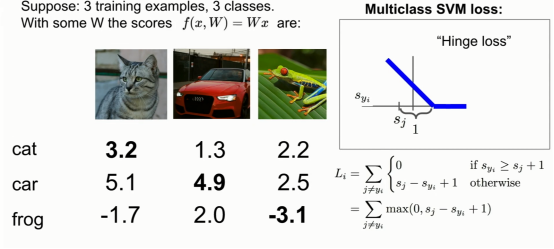

其实就是先算出每张图片的损失，然后取平均即可。
每张图片损失的算法：除了正确类的之外，每一类的预测值与正确类的预测值做减法，然后加上一个差量（图中差量设为1），与零做比较，哪个大取哪个，然后将每一类计算出的值加起来就是该张图片的损失函数的值。（简单的来说就是看其他类的预测值是否比正确类的预测值要小）


具体的一个计算的例子可以看下图
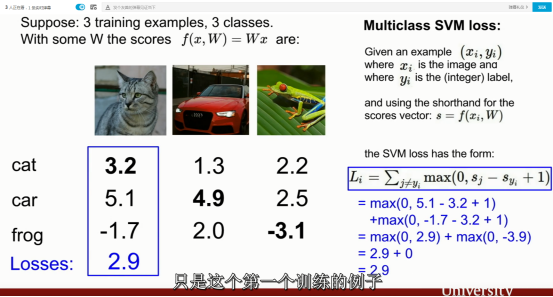

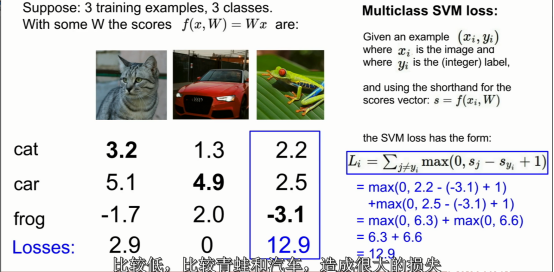

然后总的损失函数值就是每张图片的损失值和的平均
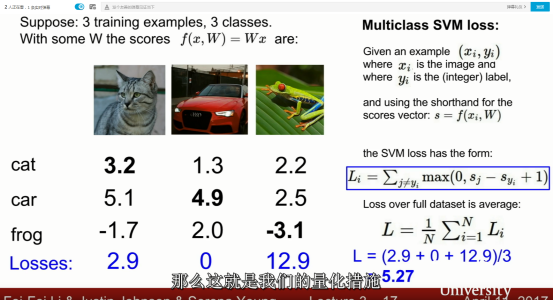

接下来在视频中介绍了一个问题，我觉得还蛮重要的：就是在当L=0时，只有一个唯一的权重矩阵W嘛？  答案当然是否定的
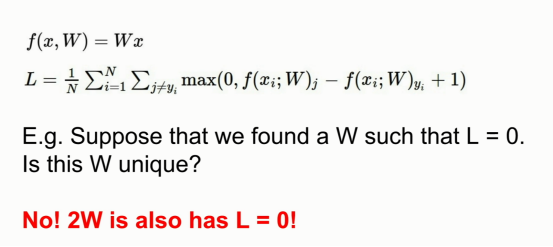
当权重矩阵变为2W时，最后每一类的预测值也会扩大相同的倍数，那么当原始L=0时，变化后的L也还会等于0的；

二、

正则化：

   视频十分形象的介绍了为什么需要正则化；就是如下图所示，当你训练好一个蓝色的曲线的一个决策面时，加入新的数据（方块）时，决策效果还不如那条比较简单的绿线；然后就引出了一个理论，在契合训练数据的基础上，最后训练出来的模型要是最简单的，后面的效果才会好。
   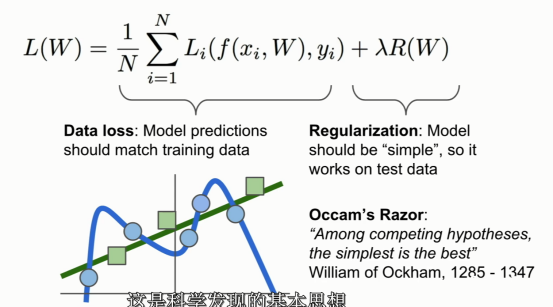
   所以正则化的作用就是拿来减少模型最后的复杂度的，当模型复杂时给予大一点的惩罚来使最后的损失变大，模型简单时则不给惩罚。

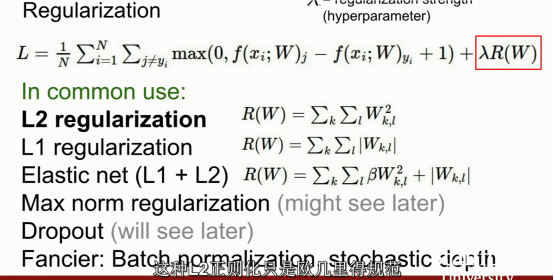
这些是一些比较常见的正则化方法，之后才会讲解。

三

接下来视频讲了softmax的损失函数
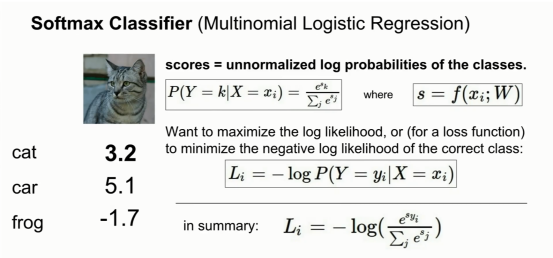
这是具体的理论公式；简单来说先是计算出这张图对应每个类别的概率Pi，然后每个概率变为exp的Pi次方，然后进行归一化后变为Qi，最后的损失函数值的输出为-log（Qi）

具体的一个例子如下图所示：
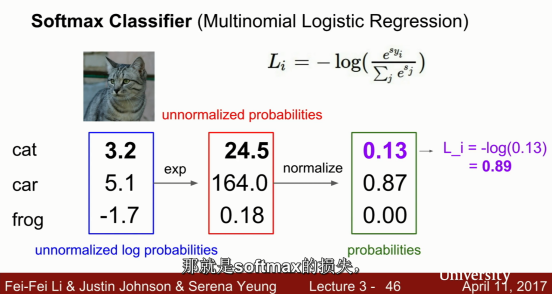

下面是一个总结的公式介绍了softmax、svm loss、最后加上正则化后输出的loss
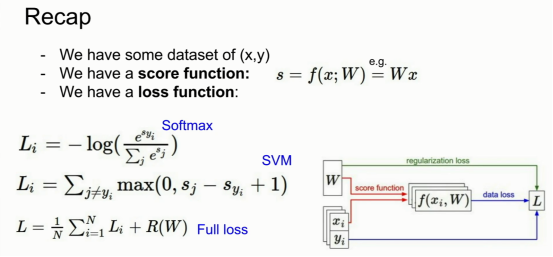

三

视频的最后一个部分简单介绍了一下优化

首先讲了如何来选择和更新权重矩阵W

第一种不可取的方法就是随机取一个W，然后去测结果。

核心思路：迭代优化虽然找到最优的权重W非常困难，甚至是不可能的（尤其当W中存的是整个神经网络的权重的时候），但如果问题转化为：对一个权重矩阵集W取优，使其损失值稍微减少。那么问题的难度就大大降低了。换句话说，我们的方法从一个随机的W开始，然后对其迭代取优，每次都让它的损失值变得更小一点，然后等到最后不能减少之后就是该权重最优的时候。
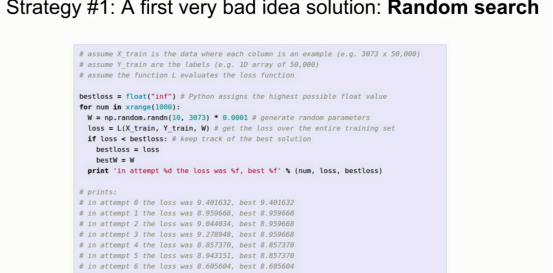




第二种方法就是跟随梯度；可以直接计算出最好的方向，这就是从数学上计算出最陡峭的方向，即要计算导数
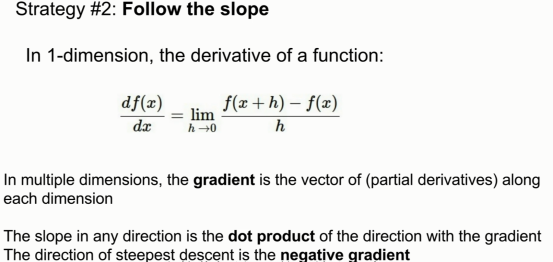

通过数学的方法计算梯度，而梯度就是在每个维度上的偏导数形成的向量

如下图所示具体的运用了这种方法，计算了在每一个维度的梯度，然后找出最抖的梯度，去更新W。

可以看见这种方法每次更新W时，需要计算每个维度的导数，更新一次，所有维度的导数计算一次

所以非常的浪费时间和资源，所以这种方法是不可取的。
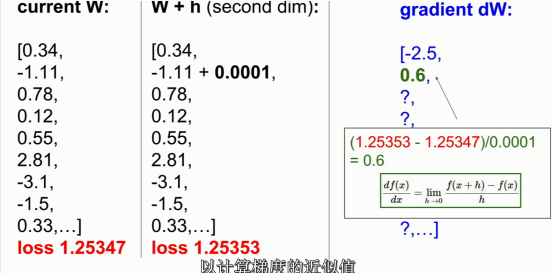


第三种方法介绍了梯度下降的方法。
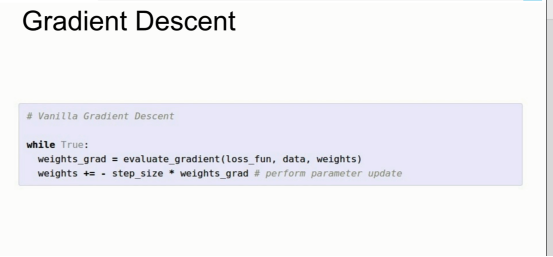
梯度下降法的思路是，朝着梯度的负方向去更新，就会使损失函数减少从而达到最好的效果。

这里就出现一个超参数叫做learning rate（学习率），指的就是梯度下降的步长，具体的之后会讲到

这边提到了一种梯度下降的方法叫SGD，具体的之后会讲。

这边提到一种处理：就是当数据集十分大的时候不可能每张图片去训练一边，这样就会很费时间和资源，所以提出一种叫做随机批处理，即每次随机取出一定量的图片进行训练，这边的一定量一般是32/64/128（都是2的倍数）
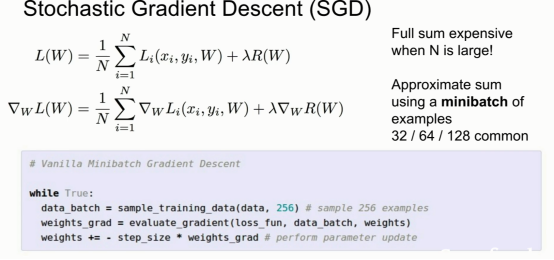


四


简单提了一下优化之后，讲到了在神经网络出现之前图像特征对于识别的积极作用。

首先提了一个简单的例子，在下图中：在左边简单的直角坐标系下会发现很难去得到一个分界线，而把直角坐标系转换到极坐标之后会发现很容易得出一个分界面，所以图像也是一样的道理，将图像的特征输入会比单纯输入图像的像素去检测会好的多
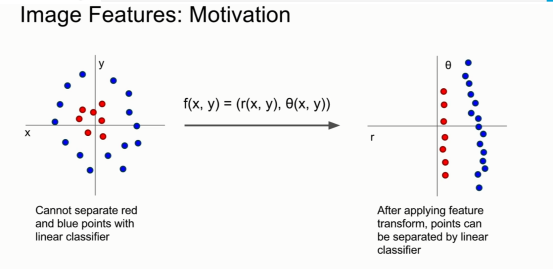

接下来就简单的介绍了一下图像的特征：
  
  1.图像的颜色直方图（这个我就不多解释了）
  
  2.图像的方向梯度直方图（Histogram of Oriented Gradient, HOG），就是在一副图像中，局部目标的表象和形状能够被梯度或边缘的方向密度分布很好地描述。其本质为：梯度的统计信息，而梯度主要存在于边缘的地方。
  
  3.就是从词包中受到的启发，将图像的色彩进行聚类，运用K-means（K均值），然后输入到分类器中，
  
  以上三种方法的实例如下面图所示
  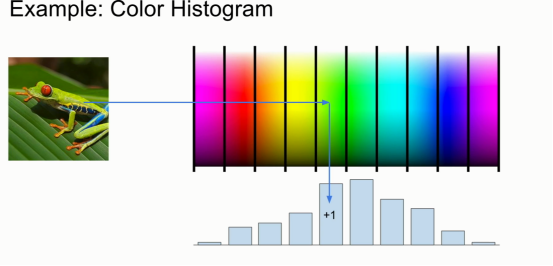

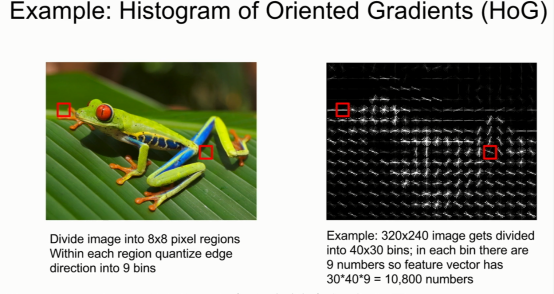

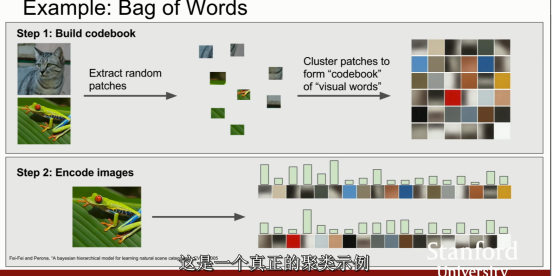



最后就是讲了一下特征识别和神经网络的差别：
   
   特征识别是需要通过人为去设计特征提取的算法去提取图像的特征，然后在输入到分类器中
   
   而神经网络就是输入一张图片，通过不断的卷积、池化等操作，最后直接输出每类的概率进行分类
   
   我觉得两者最主要的区别就是前者需要人去想不同的特征提取来适应要运用到不同环境时的操作；而后者只需要通过不断的卷积就好了。
   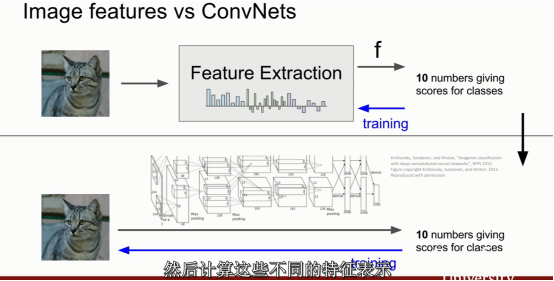